In [1]:
import pandas as pd
from collections import defaultdict
from Operators.evaluation import *

In [2]:
fitness_dfs = load_fitness_logs("fitness_logs")

Loaded 12 configurations from 'fitness_logs'


In [3]:
fitness_dfs.keys()

dict_keys(['POP=100 XO=0.9 mut_prob=0.1 mutation=full_position_swap_2teams crossover=crossover_swap_whole_position selection_alg=tournament_selection', 'POP=100 XO=0.9 mut_prob=0.1 mutation=full_position_swap_2teams crossover=crossover_swap_extreme_player selection_alg=tournament_selection', 'POP=100 XO=0.9 mut_prob=0.1 mutation=single_player_swap_2teams crossover=crossover_swap_whole_position selection_alg=roulette_selection', 'POP=100 XO=0.9 mut_prob=0.1 mutation=full_position_swap_2teams crossover=crossover_swap_whole_position selection_alg=roulette_selection', 'POP=100 XO=0.9 mut_prob=0.1 mutation=single_player_swap_2teams crossover=crossover_swap_whole_position selection_alg=tournament_selection', 'POP=100 XO=0.9 mut_prob=0.1 mutation=single_player_swap_2teams crossover=crossover_swap_extreme_player selection_alg=tournament_selection', 'POP=100 XO=0.9 mut_prob=0.1 mutation=single_player_shift_all_teams crossover=crossover_swap_whole_position selection_alg=roulette_selection', 'POP

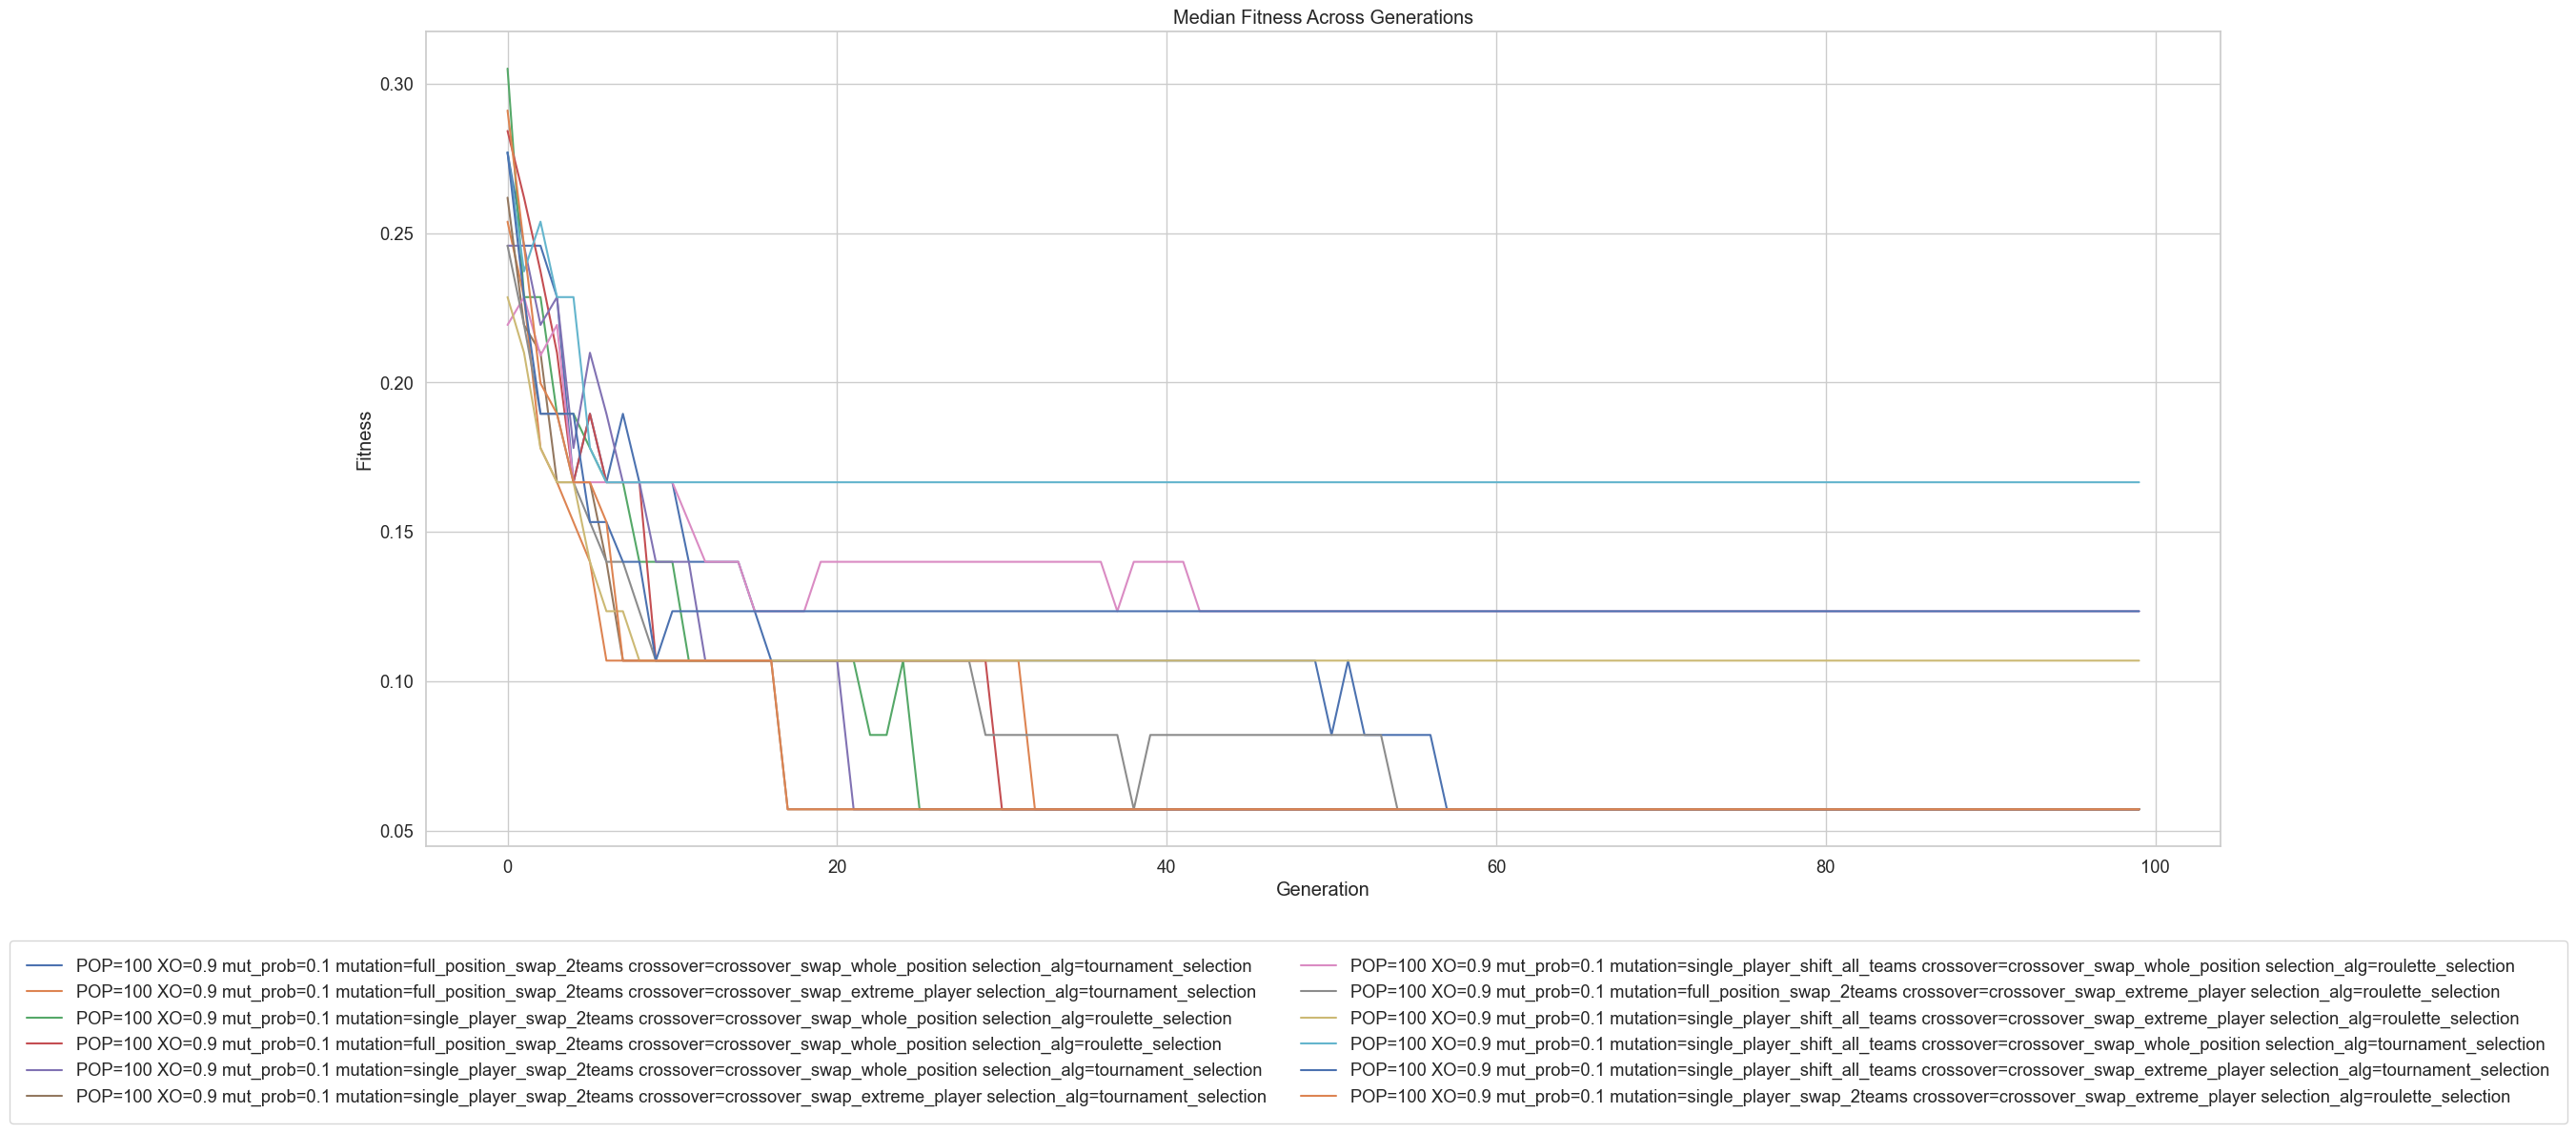

In [4]:
plot_median_fitness_over_gen(fitness_dfs)

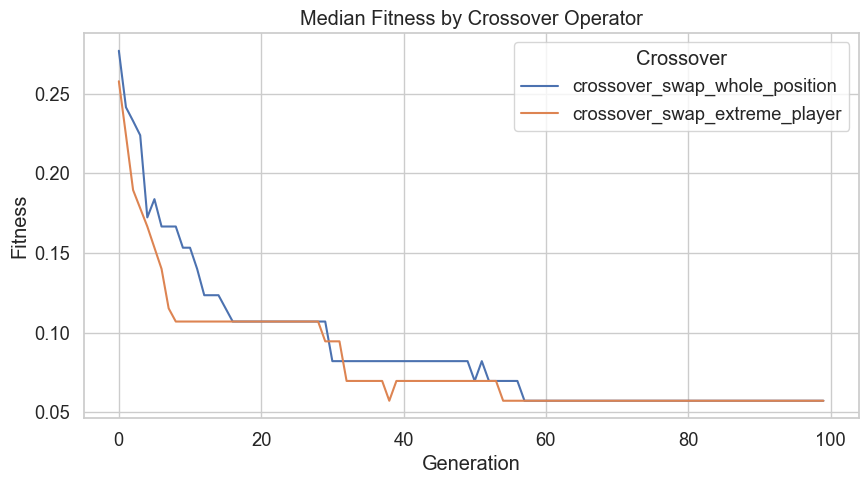

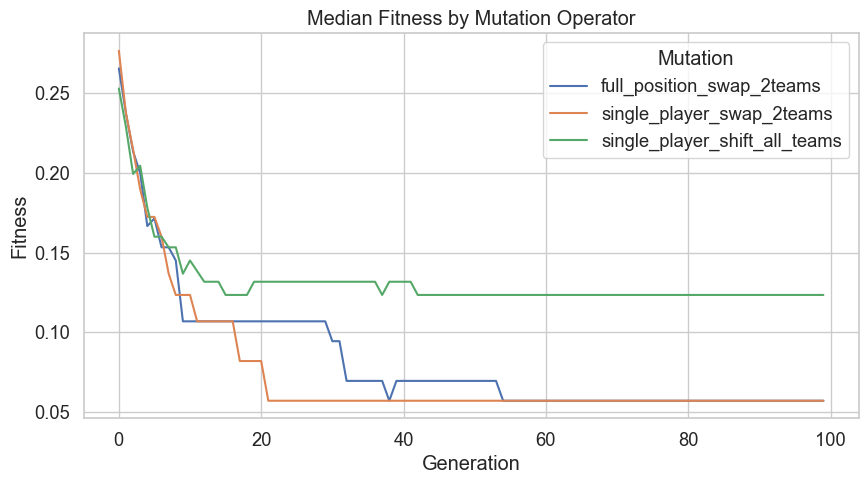

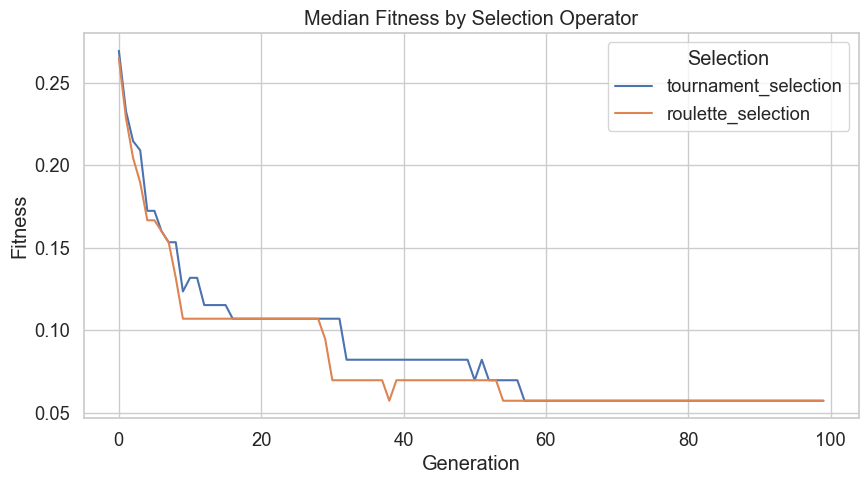

In [5]:
plot_median_fitness_by_operator("fitness_logs")


 Friedman Test (non-parametric ANOVA for repeated measures)

Use when: You want to compare 3 or more configurations across repeated runs (e.g., different crossover strategies).

Assumption: Repeated measurements across same conditions.

Output: Tells you if there is a statistically significant difference somewhere in the group.


### Evaluating statistical significance across full hyperparameter configurations
Constraints:
* Same dataset: All configurations are tested on the same dataset
* Same number of runs: Each configuration must have the same number of runs (30)
* Same evaluation metric:  final fitness from each run

Null hypothesis (H₀): All configurations perform equally (no statistically significant difference in performance).

If p < 0.05: You can reject H₀ — at least one configuration performs significantly differently.

In [6]:
fitness_dfs = load_fitness_logs("fitness_logs")
labels, results = run_friedman_test_on_best_fitness(fitness_dfs)

Loaded 12 configurations from 'fitness_logs'

Friedman Test Results:
Test Statistic: 182.7342
P-value:        0.0000
Significant difference detected between configurations (reject H₀)


### Analyzing only the best-performing configurations from slim_summary.csv

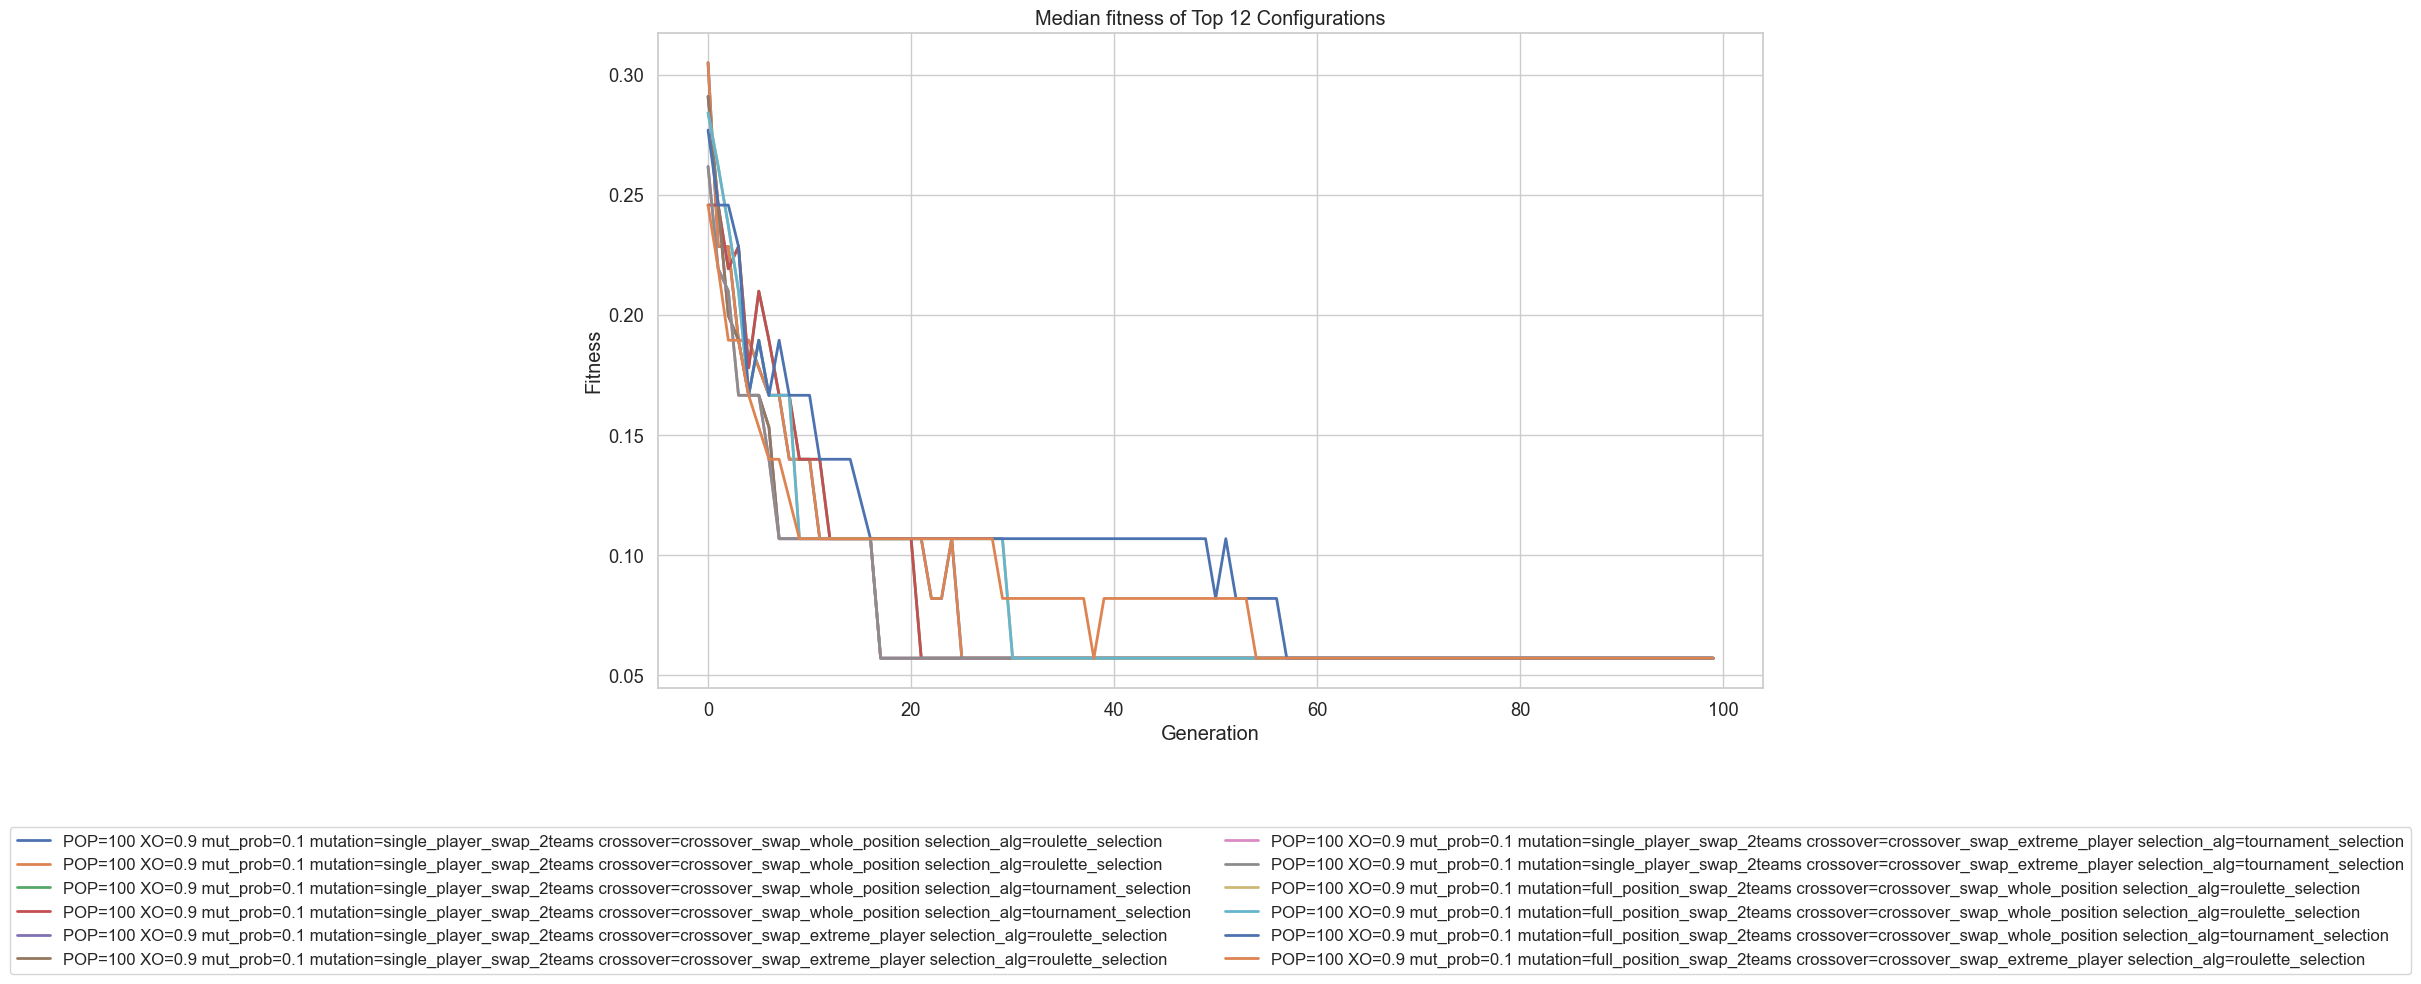

In [7]:
plot_top_configs(summary_path="ga_summary.csv",fitness_log_folder='fitness_logs', top_n=12, metric='median_fitness')

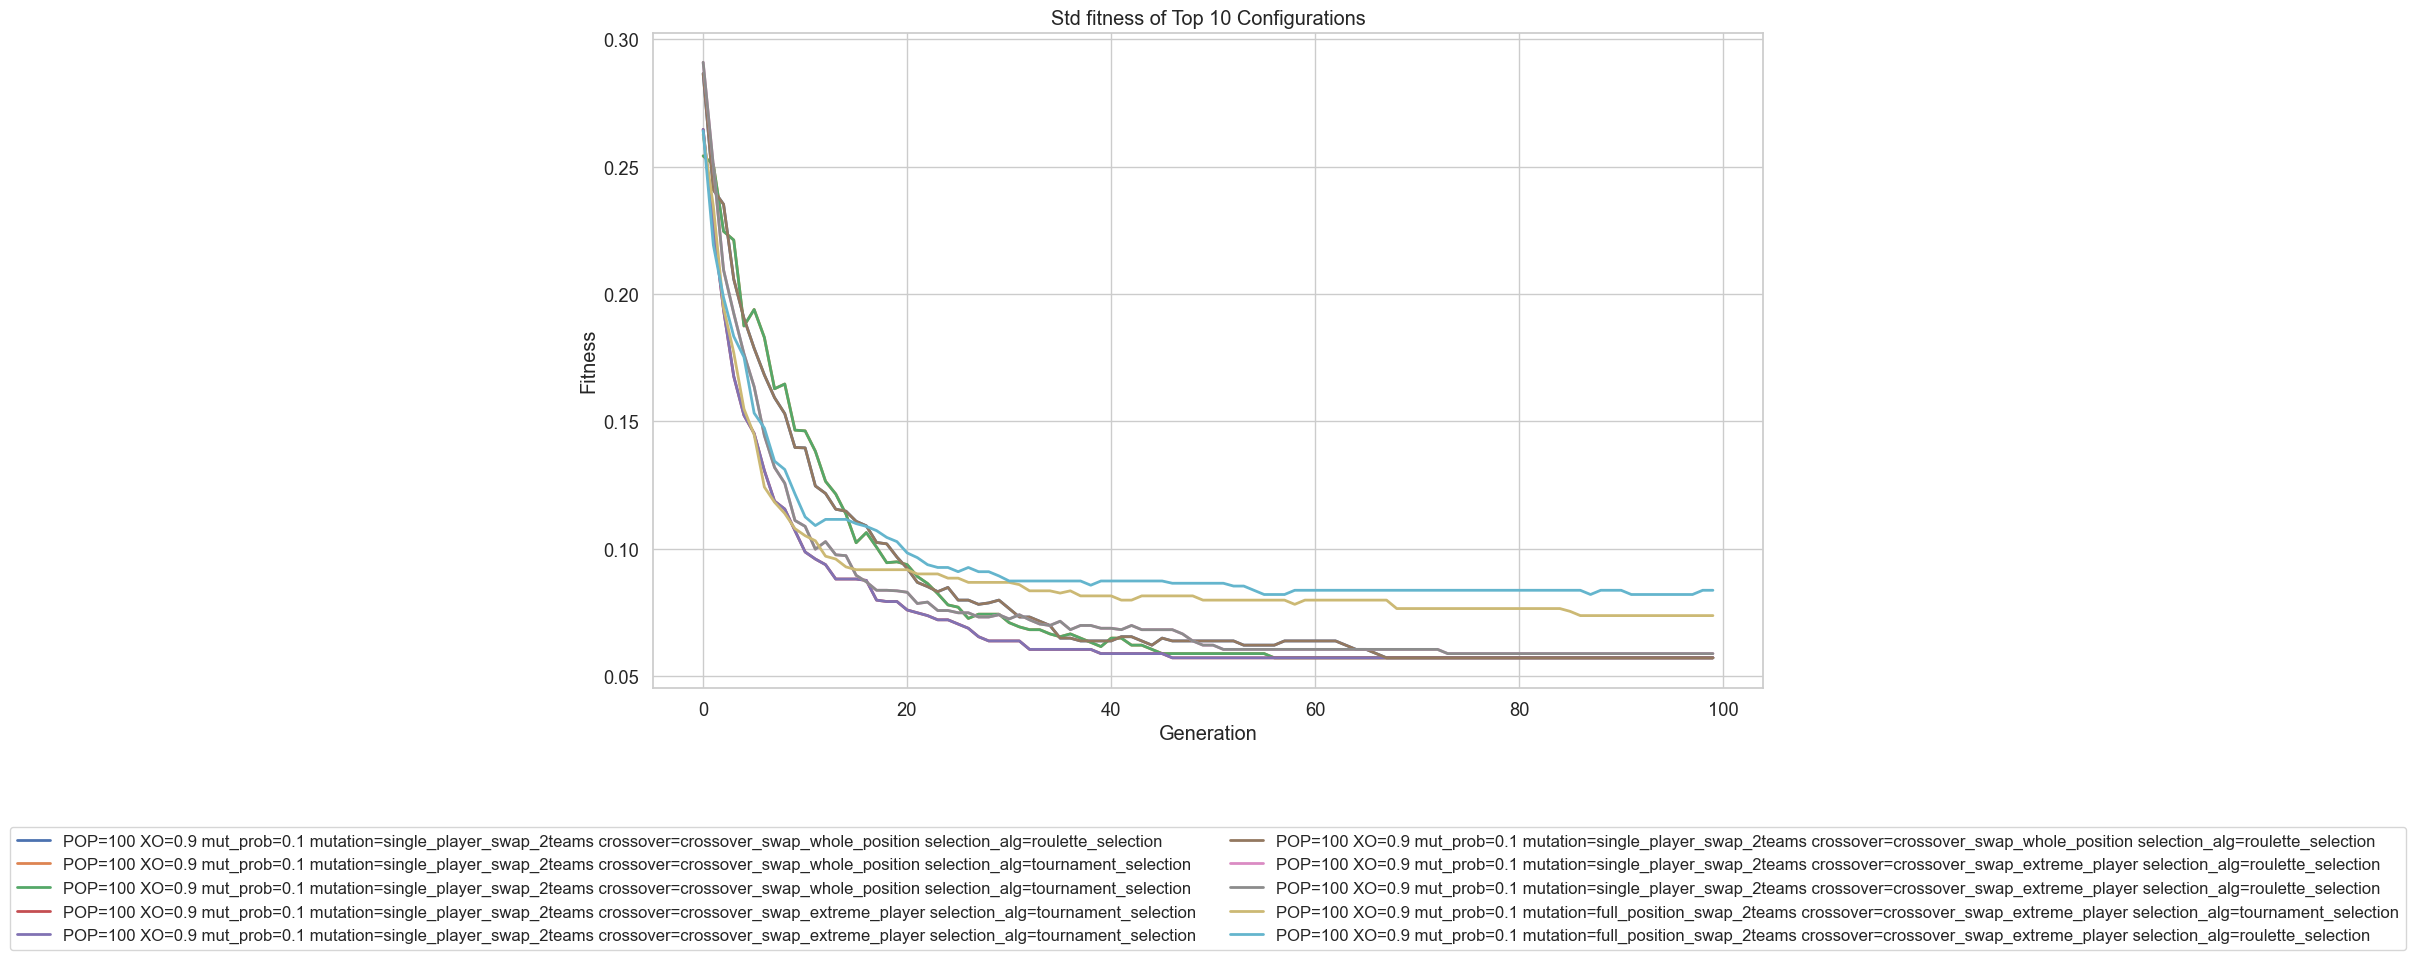

In [8]:
plot_top_configs(summary_path="ga_summary.csv",fitness_log_folder='fitness_logs', top_n=10, metric="std_fitness")

/Users/juliakarpienia/Desktop/NOVA IMS /2nd sem/CIFO/CIFO_project_groupA/Operators/evaluation.py:213: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


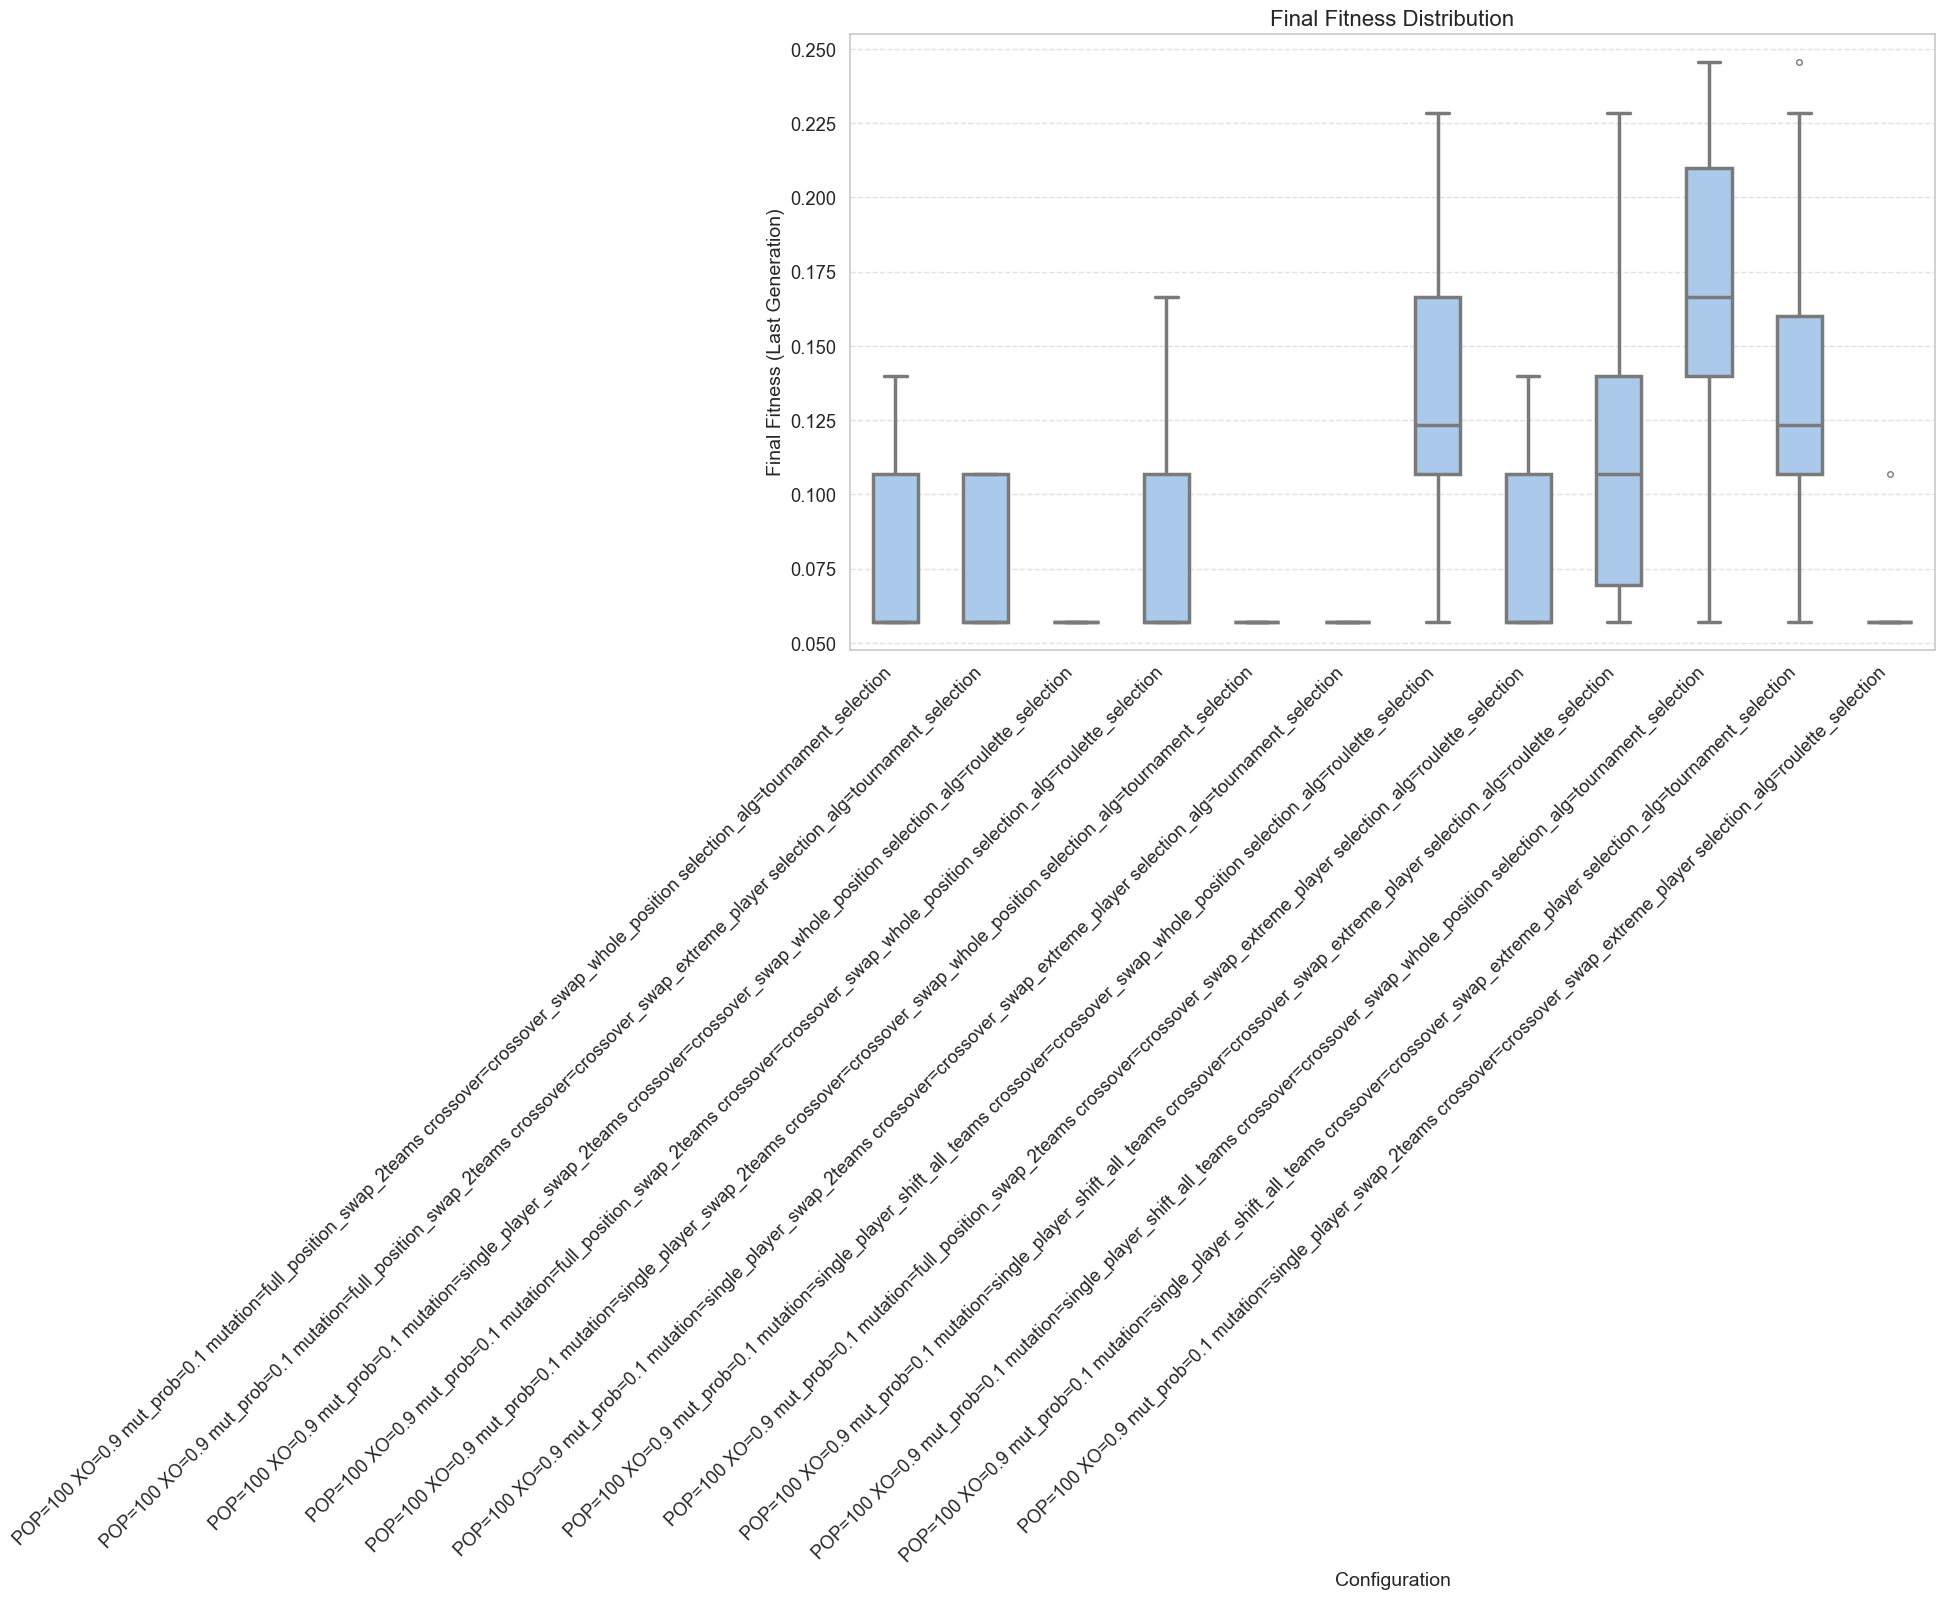

In [9]:
plot_final_fitness_boxplot()


/Users/juliakarpienia/Desktop/NOVA IMS /2nd sem/CIFO/CIFO_project_groupA/Operators/evaluation.py:250: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


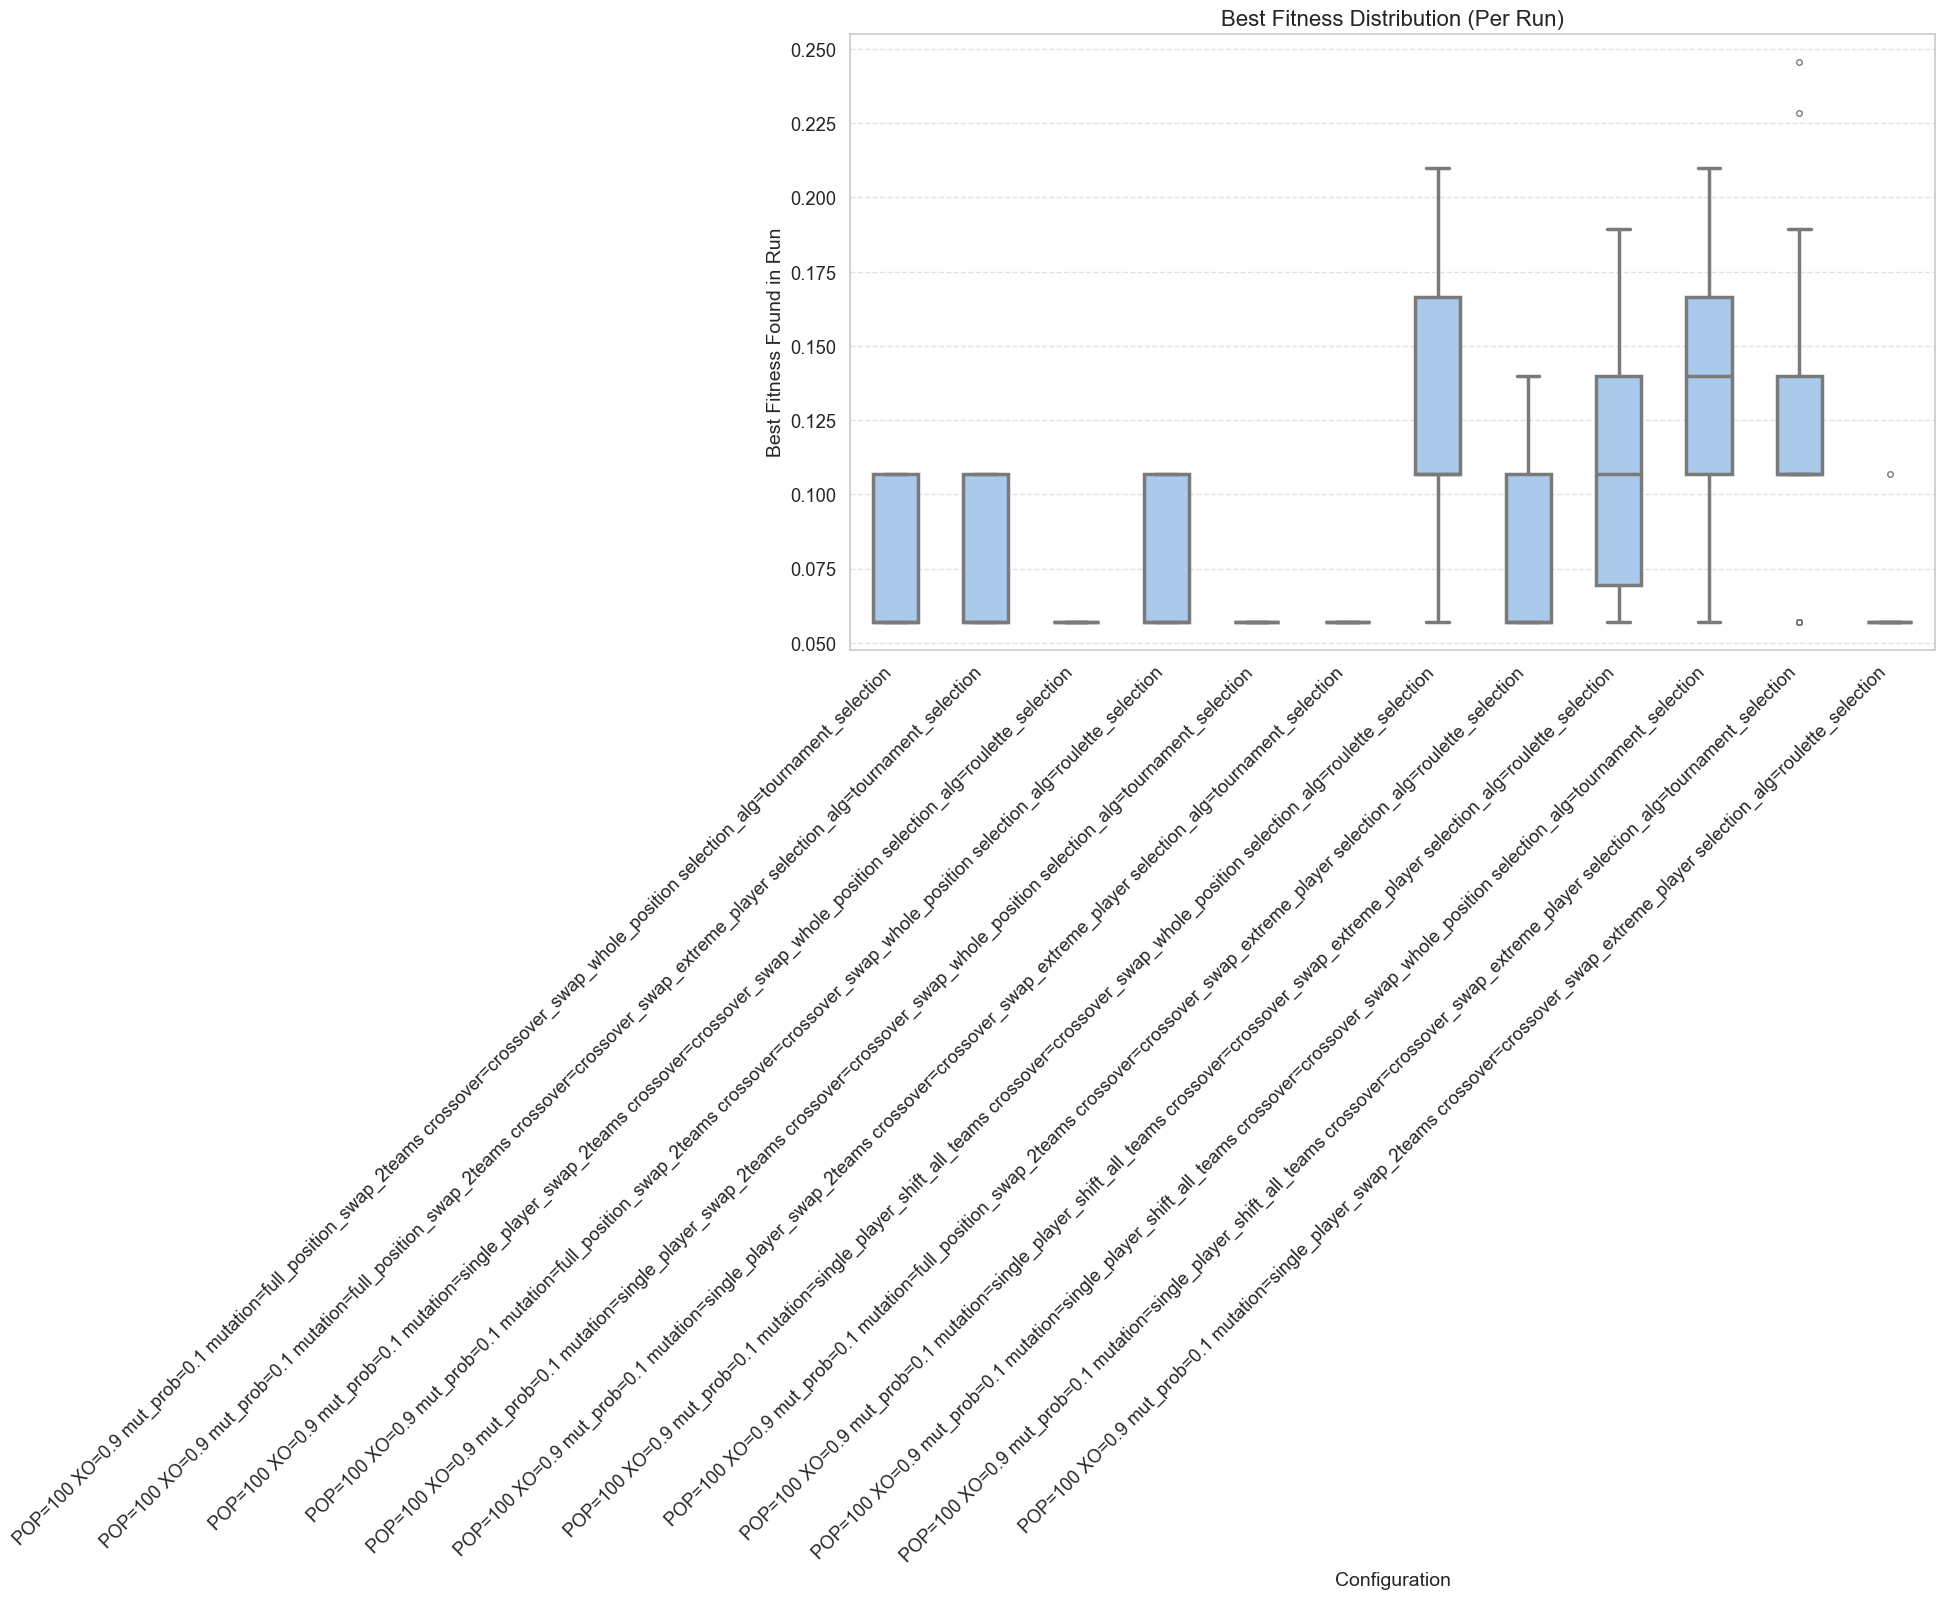

In [10]:
plot_best_fitness_boxplot()

In [11]:
posthoc_results = run_posthoc_nemenyi_from_best_fitness(labels, results)


Post-hoc Nemenyi Test (p-values):
                                                    POP=100 XO=0.9 mut_prob=0.1 mutation=full_position_swap_2teams crossover=crossover_swap_whole_position selection_alg=tournament_selection  \
POP=100 XO=0.9 mut_prob=0.1 mutation=full_posit...                                             1.0000                                                                                           
POP=100 XO=0.9 mut_prob=0.1 mutation=full_posit...                                             1.0000                                                                                           
POP=100 XO=0.9 mut_prob=0.1 mutation=single_pla...                                             0.5349                                                                                           
POP=100 XO=0.9 mut_prob=0.1 mutation=full_posit...                                             1.0000                                                                                           


/Users/juliakarpienia/Desktop/NOVA IMS /2nd sem/CIFO/CIFO_project_groupA/Operators/evaluation.py:350: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


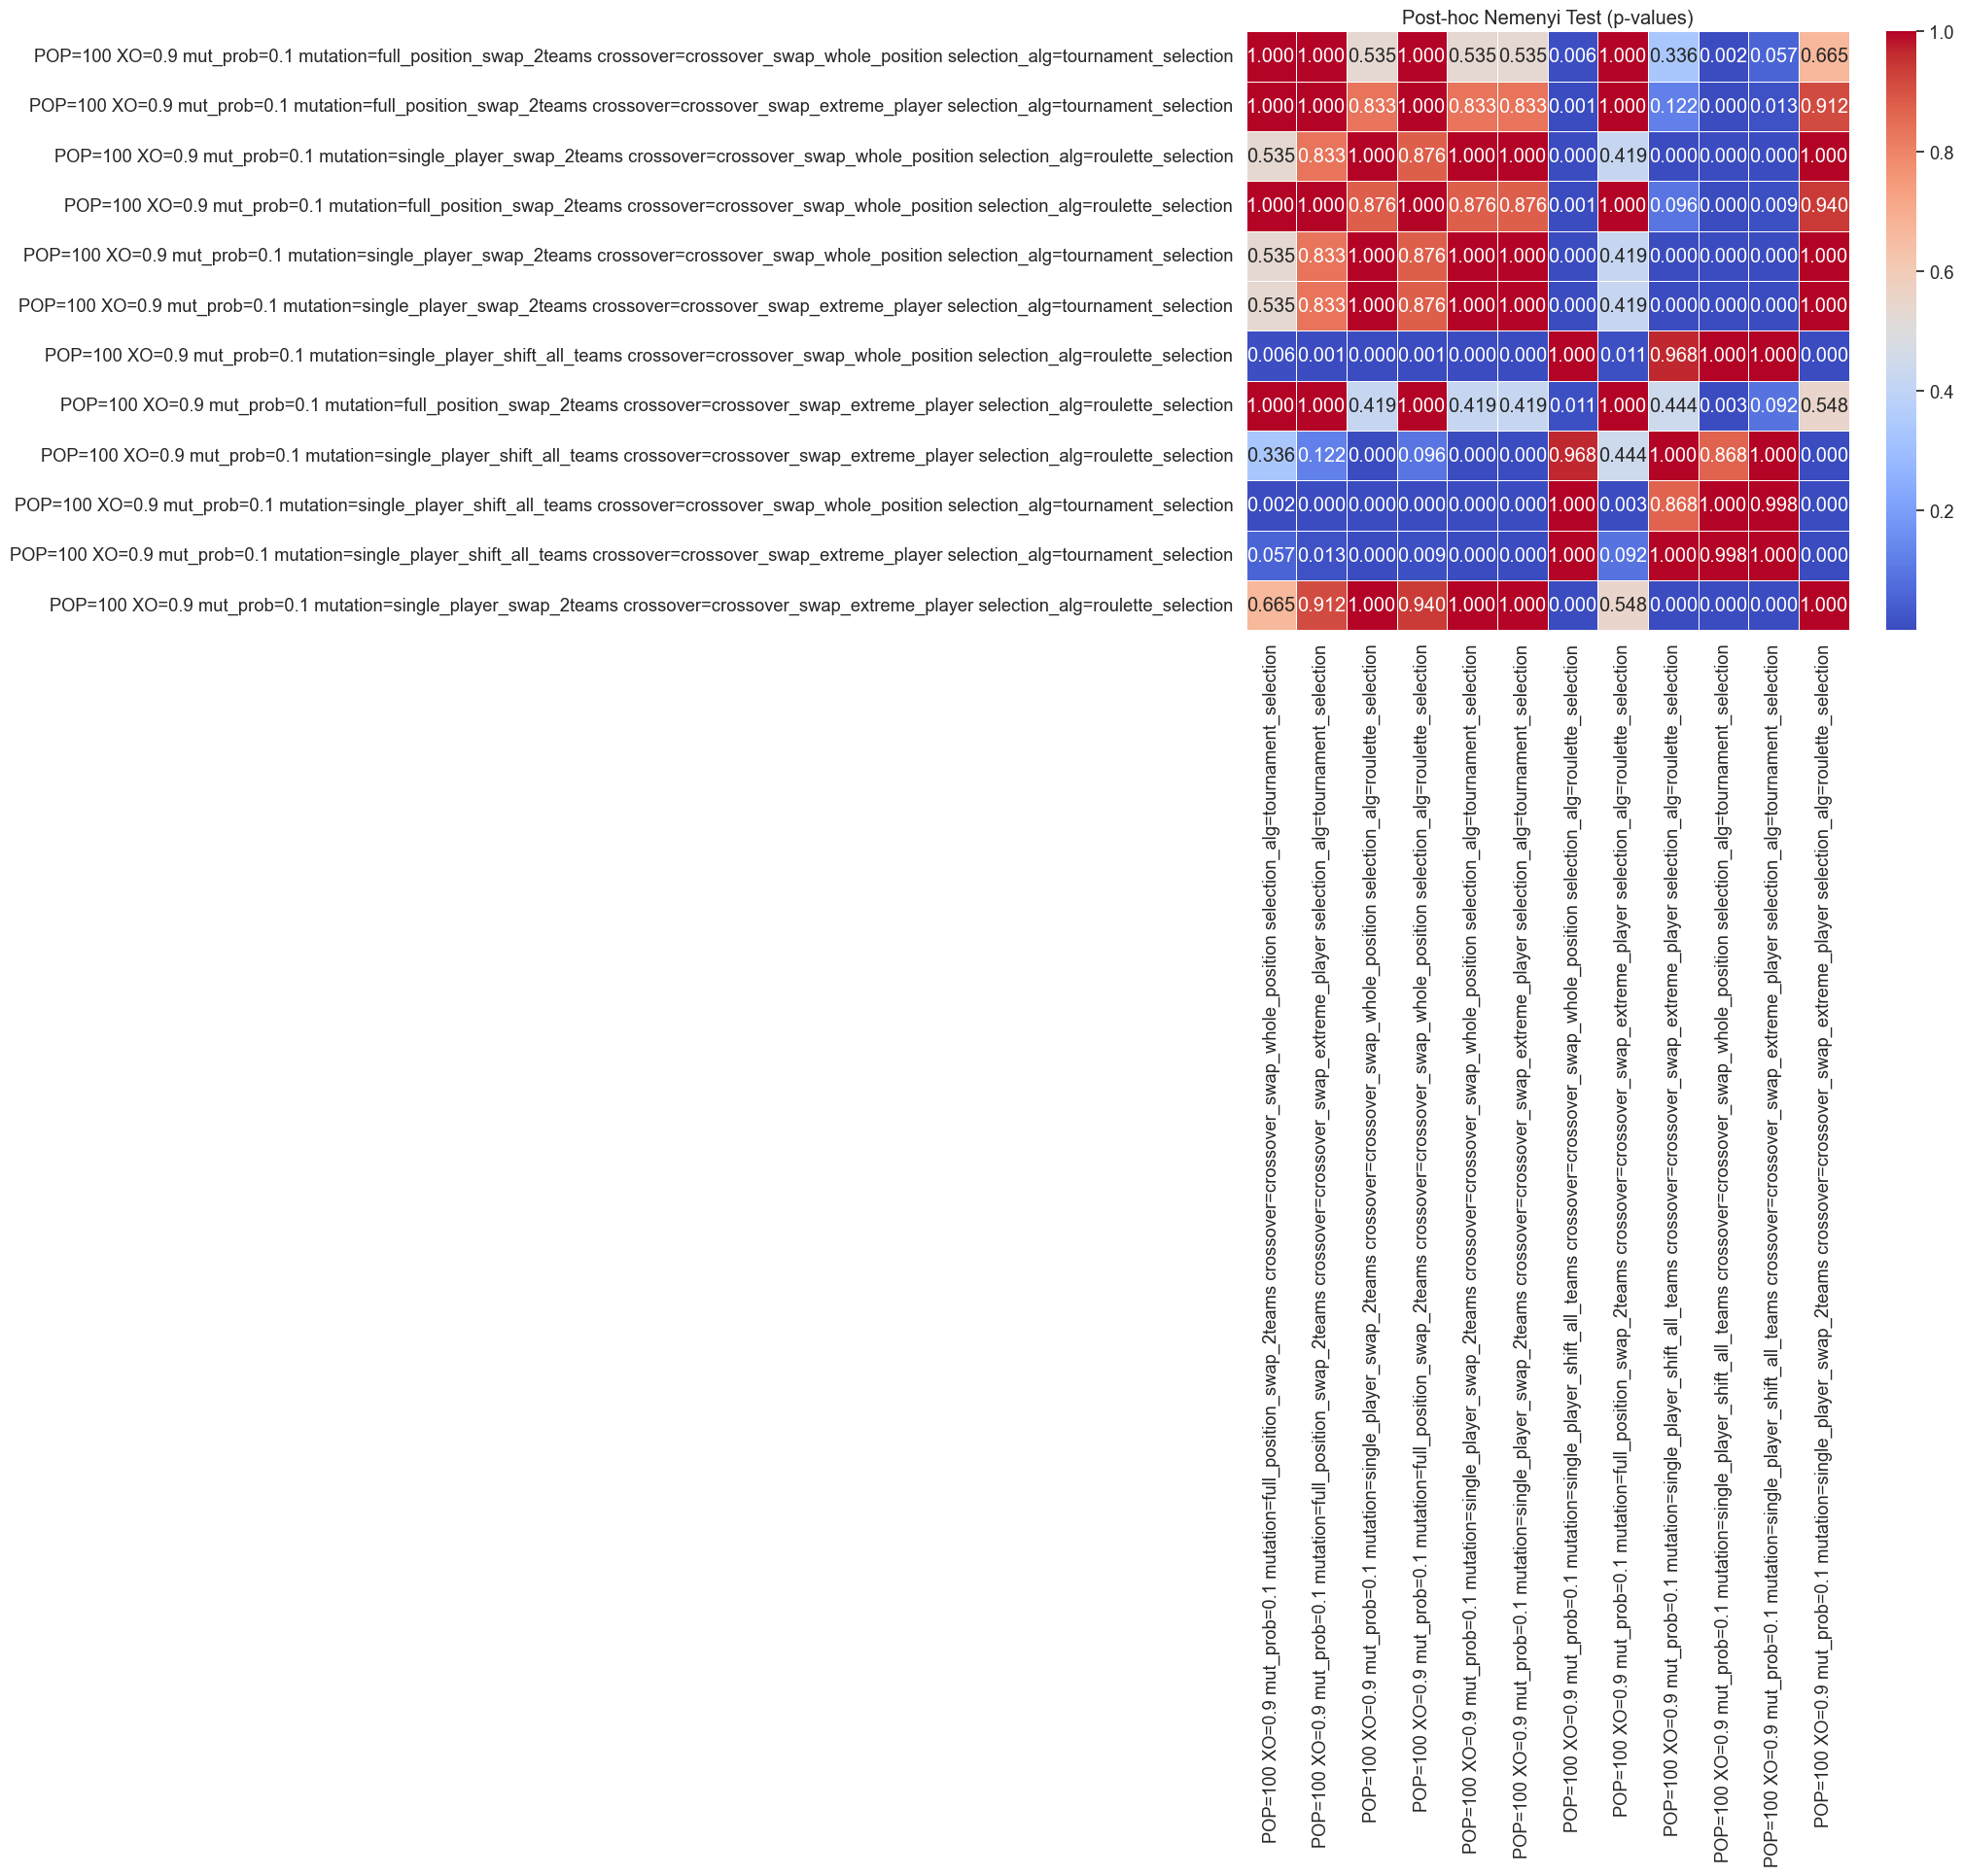

In [12]:
plot_posthoc_heatmap(posthoc_results)
